In [139]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from stable_baselines3.common.results_plotter import load_results, ts2xy

In [140]:
dir = "p_date=2022-12-18-20_16_36"

log_dir = f"../../output/weights/{dir}"

data = pd.read_csv(f"{log_dir}/monitor.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7821 entries, r to -118.7
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   #{"t_start": 1671390996.9537265  7821 non-null   object
 1    "env_id": null}                 7821 non-null   object
dtypes: object(2)
memory usage: 183.3+ KB


In [141]:
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')


def plot_results(log_folder, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), 'timesteps')
    y = moving_average(y, window=250)
    # Truncate x
    x = x[len(x) - len(y):]

    fig = plt.figure(title, figsize=(15,5))
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()


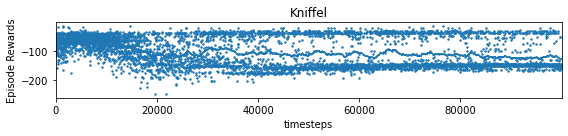

In [142]:
from stable_baselines3.common import results_plotter

# Helper from the library
results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "Kniffel")

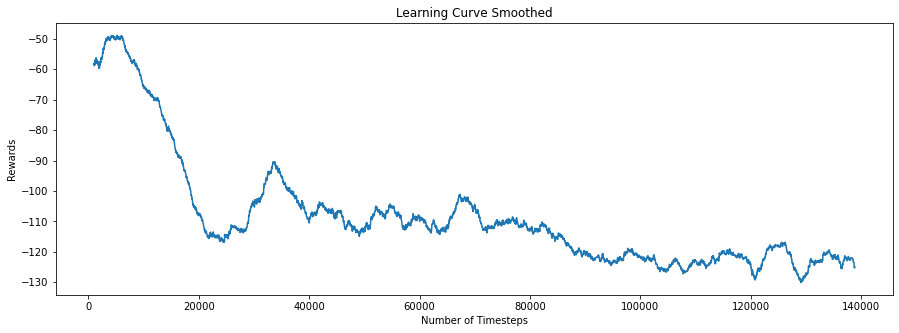

In [143]:
plot_results(log_dir)